# Moving Avergage Smoothing

To remove the fine-grained variation between time steps. 
The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes.

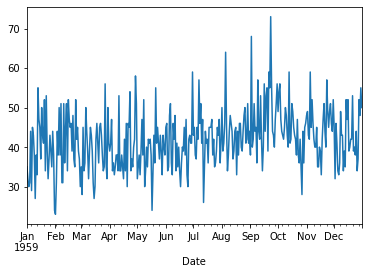

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

series = pd.read_csv('datasets/daily-total-female-births.csv', index_col=0, parse_dates=True, squeeze=True)
series.plot()
plt.show()

dataframe = pd.DataFrame(series)
print(dataframe.head())

## Moving Average as Data Preparation

Help creating a smoother version of the orignal dataset

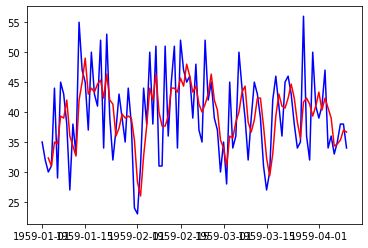

In [2]:
rolling = series.rolling(window=3) # return a Rolling object
rolling_mean = rolling.mean() # return a DataFrame

fig, ax = plt.subplots()
ax.plot(dataframe[0:100], color="blue")
ax.plot(rolling_mean[0:100], color="red")

## Moving Average as Feature Engineering

The moving average is calculated and added as a new input feature used to predict the next time step



In [7]:
from pandas import DataFrame
from pandas import concat

df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))
print(type(lag1))
print(lag1.head())
print(type(window))

        mean   t-1  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27
<class 'pandas.core.frame.DataFrame'>
      0
0   NaN
1  35.0
2  32.0
3  30.0
4  31.0
<class 'pandas.core.window.rolling.Rolling'>
Rolling [window=3,center=False,axis=0]


## Moving Average as Prediction 

In [18]:
from numpy import mean
from sklearn.metrics import mean_squared_error

# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

In [19]:
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


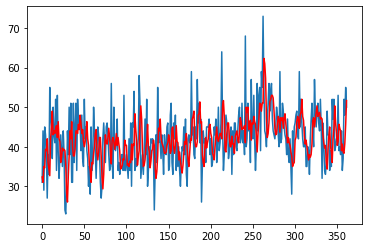

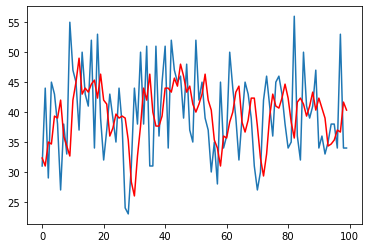

In [21]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()